In [1]:
import xgboost as xgb
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [44]:
# iris is a dictionary, to find out the key
for key,_ in iris.items():
    print(key)

data
target
target_names
DESCR
feature_names


In [25]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

默认情况使用plot_tree值显示特征序号，不显示特征名字。
显示特征名字(1) 把特征保存到 .fmap文件 (2) plot_tree使用fmap参数

In [40]:
def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1
    outfile.close()
# no space in the featurs, so define it directly    
ceate_feature_map(['sepal_length','sepal_width','petal_len','petal_width'])#特征名列表

In [ ]:
!type xgb.fmap

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


In [29]:
# Setting some parameters

parameters = {
    'eta': 0.3,  
    'silent': False,  # option for logging
    'objective': 'multi:softprob',  # error evaluation for multiclass tasks
    'num_class': 3,  # number of classes to predic
    'max_depth': 3  # depth of the trees in the boosting process
    }  
num_round = 20  # the number of training iterations
#training the model
bst = xgb.train(parameters, dtrain, num_round)
#resut
preds = bst.predict(dtest)


不通过fig.set_size_inches，直接用plot_tree图片太小，模糊不清

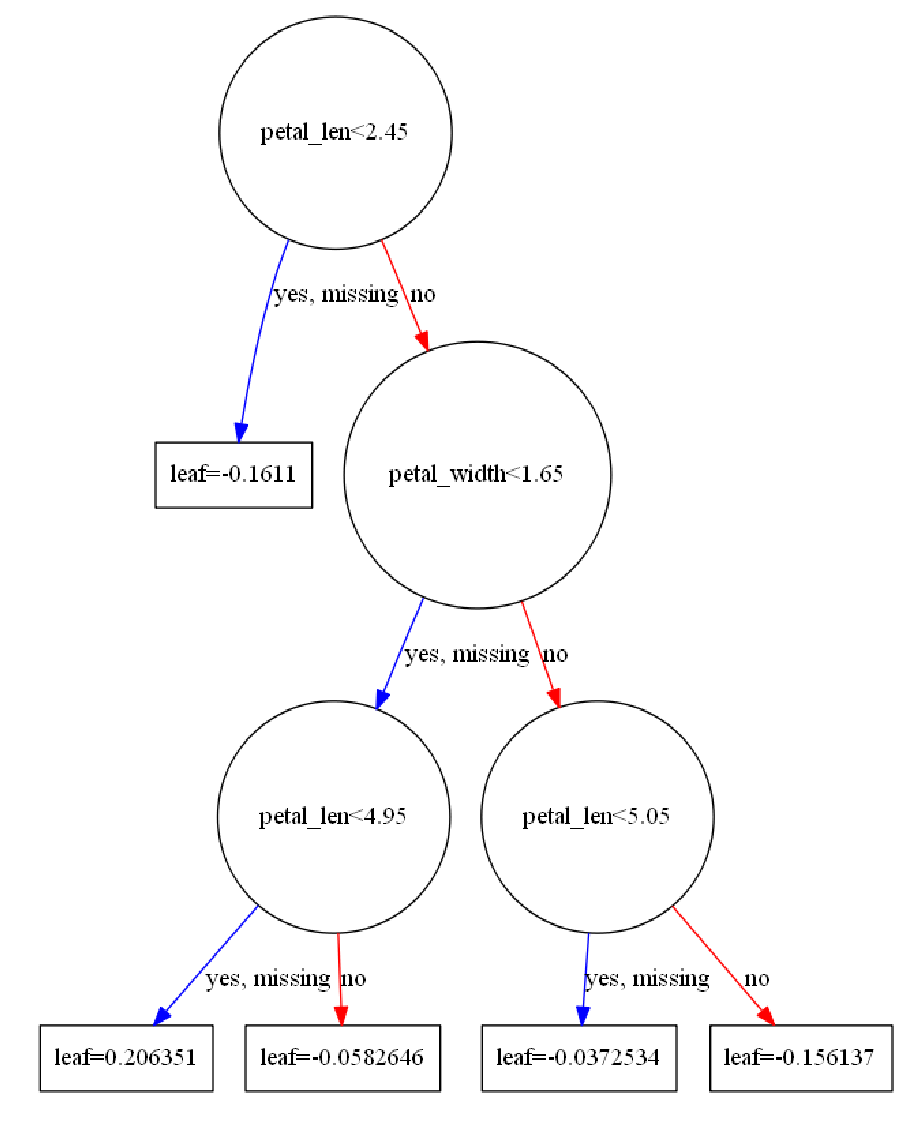

In [46]:
import graphviz
fig,ax = plt.subplots()
fig.set_size_inches(20,20)
#  xgb.fmap 用来显示 特征的名字，而非 f0,f1,f2无意义的符号
xgb.plot_tree(bst, ax=ax,num_trees=10, fmap='xgb.fmap')  

In [48]:
fig.savefig('iris_tree.png')

In [9]:
'''
Selecting the column that represents the highest probability 
(note that, for each line, there is 3 columns, indicating the probability for each class)
'''

import numpy as np

best_preds = np.asarray([np.argmax(line) for line in preds])

In [11]:
#calculating the precision

from sklearn.metrics import precision_score

print(precision_score(y_test, best_preds, average='macro'))

1.0


In [12]:
y_test,best_preds

(array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]),
 array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0], dtype=int64))